In [1]:
from random import random
import seaborn as sns
import matplotlib.pyplot as plt

In [269]:
def titfortat(liste_coups_joueur,liste_coups_adverses):
  if len(liste_coups_adverses) == 0:
    return 1
  elif liste_coups_adverses[-1]:
    return 1
  else:
    return 0

def allD(liste_coups_joueur,liste_coups_adverses):
  return 0

def allC(liste_coups_joueur,liste_coups_adverses):
  return 1

def rando(liste_coups_joueur,liste_coups_adverses):
  return int(random()*2)

def rareC(liste_coups_joueur,liste_coups_adverses):
  if random()<0.1:
    return 1
  else:
    return 0

def grudger(liste_coups_joueur,liste_coups_adverses):
  if len(liste_coups_adverses) > 0 and 0 in liste_coups_adverses:
    return 0
  else:
    return 1

def titfortatrareD(liste_coups_joueur,liste_coups_adverses):
  if len(liste_coups_adverses) == 0:
    return 1
  elif liste_coups_adverses[-1]:
    return int(random()*2)
  else:
    return 0

def titfortwotats(liste_coups_joueur,liste_coups_adverses):
  if len(liste_coups_adverses) < 2:
    return 1
  elif liste_coups_adverses[-1]+liste_coups_adverses[-2] == 0:
    return 0
  else:
    return 1

def twotitsfortat(liste_coups_joueur,liste_coups_adverses):
  if len(liste_coups_adverses) < 1:
    return 1
  elif liste_coups_adverses[-1] == 0 or (len(liste_coups_adverses) > 1 and liste_coups_adverses[-2] == 0):
    return 0
  else:
    return 1

def alterne(liste_coups_joueur,liste_coups_adverses):
  if len(liste_coups_adverses) < 1:
    return 1
  else:
    return 1-liste_coups_joueur[-1]

def titfortatmefiant(liste_coups_joueur,liste_coups_adverses):
  if len(liste_coups_adverses) == 0:
    return 0
  elif liste_coups_adverses[-1]:
    return 1
  else:
    return 0

def Benjamin1(liste_coups_joueur,liste_coups_adverses):
  if len(liste_coups_adverses) == 0:
    return 1
  elif len(liste_coups_adverses)%2:
    return 0
  else:
    return int(random()*2)

def Benjamin2(liste_coups_joueur,liste_coups_adverses):
  if len(liste_coups_adverses)%3 == 0:
    return 1
  elif len(liste_coups_adverses)%3 == 1:
    return int(random()*2)
  else:
    return 0

def ntitsfortat(liste_coups_joueur,liste_coups_adverses):
  n = 100
  if len(liste_coups_adverses) < 1:
    return 1
  while len(liste_coups_adverses) < n:
    if 0 in liste_coups_adverses:
      return 0
    else:
      return 1
  if 0 in liste_coups_adverses[-n:]:
    return 0
  else:
    return 1

def titforntats(liste_coups_joueur,liste_coups_adverses):
  n = 3
  if len(liste_coups_adverses) < 1:
    return 1
  while len(liste_coups_adverses) < n:
    if 1 in liste_coups_adverses:
      return 1
    else:
      return 0
  if 1 in liste_coups_adverses[-n:]:
    return 1
  else:
    return 0

In [260]:
def raz():
  global liste_joueurs,liste_strategies,dico_strategies,dico_scores,matrice_tournoi
  liste_joueurs = ["titfortat","allD","allC","rando","rareC","grudger","titfortatrareD","titfortwotats","twotitsfortat","alterne","titfortatmefiant","Benjamin1","Benjamin2","ntitsfortat","titforntats"]
  liste_strategies = [titfortat,allD,allC,rando,rareC,grudger,titfortatrareD,titfortwotats,twotitsfortat,alterne,titfortatmefiant,Benjamin1,Benjamin2,ntitsfortat,titforntats]
  dico_strategies = {J:S for (J,S) in zip(liste_joueurs,liste_strategies)}
  dico_scores = {J:0 for J in liste_joueurs}
  matrice_tournoi = [[0 for _ in range(len(liste_joueurs))] for _ in range(len(liste_joueurs))]

In [96]:
matrice_tournoi

[[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [270]:
def partie(joueurA,joueurB):
  nbre_parties = 200
  score_joueurA = 0
  score_joueurB = 0
  liste_coups_joueurA = []
  liste_coups_joueurB = []
  for i in range(nbre_parties):
    JA = dico_strategies[joueurA](liste_coups_joueurA,liste_coups_joueurB)
    JB = dico_strategies[joueurB](liste_coups_joueurB,liste_coups_joueurA)
    liste_coups_joueurA.append(JA)
    liste_coups_joueurB.append(JB)
    if JA:
      if JB:
        score_joueurA += 3
        score_joueurB += 3
      else:
        score_joueurA += 0
        score_joueurB += 5
    else:
      if JB:
        score_joueurA += 5
        score_joueurB += 0
      else:
        score_joueurA += 1
        score_joueurB += 1
  if joueurA == joueurB:
    dico_scores[joueurA] += score_joueurA
    matrice_tournoi[liste_joueurs.index(joueurA)][liste_joueurs.index(joueurA)] += score_joueurA
  else:
    dico_scores[joueurA] += score_joueurA
    dico_scores[joueurB] += score_joueurB
    matrice_tournoi[liste_joueurs.index(joueurB)][liste_joueurs.index(joueurA)] += score_joueurB
    matrice_tournoi[liste_joueurs.index(joueurA)][liste_joueurs.index(joueurB)] += score_joueurA

In [274]:
def tournoi():
  global partie
  nb_tournois = 50
  for i in range(nb_tournois):
    for j,JA in enumerate(liste_joueurs):
      for JB in liste_joueurs[j:]:
        partie(JA,JB)

In [219]:
raz()
partie("allD","titfortat")
dico_scores

{'titfortat': 999,
 'allD': 1004,
 'allC': 0,
 'rando': 0,
 'rareC': 0,
 'grudger': 0,
 'titfortatrareD': 0,
 'titfortwotats': 0,
 'twotitsfortat': 0,
 'alterne': 0,
 'titfortatmefiant': 0,
 'Benjamin1': 0,
 'Benjamin2': 0,
 'ntitsfortat': 0}

In [291]:
raz()
tournoi()

In [292]:
liste_scores = [dico_scores[k] for k in dico_scores]
combo = list(zip(liste_scores,liste_joueurs))
combo.sort(reverse=True)
for s,j in combo:
  print(f"{j:17} : {s}")

grudger           : 363928
ntitsfortat       : 363496
twotitsfortat     : 358124
titfortat         : 356239
titfortwotats     : 337842
titforntats       : 330904
allC              : 310863
alterne           : 292648
Benjamin2         : 291890
Benjamin1         : 286511
rando             : 284695
titfortatmefiant  : 277850
rareC             : 276033
allD              : 265500
titfortatrareD    : 249182


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0.5, 1, 'titfortat'),
  Text(1.5, 1, 'allD'),
  Text(2.5, 1, 'allC'),
  Text(3.5, 1, 'rando'),
  Text(4.5, 1, 'rareC'),
  Text(5.5, 1, 'grudger'),
  Text(6.5, 1, 'titfortatrareD'),
  Text(7.5, 1, 'titfortwotats'),
  Text(8.5, 1, 'twotitsfortat'),
  Text(9.5, 1, 'alterne'),
  Text(10.5, 1, 'titfortatmefiant'),
  Text(11.5, 1, 'Benjamin1'),
  Text(12.5, 1, 'Benjamin2'),
  Text(13.5, 1, 'ntitsfortat')])

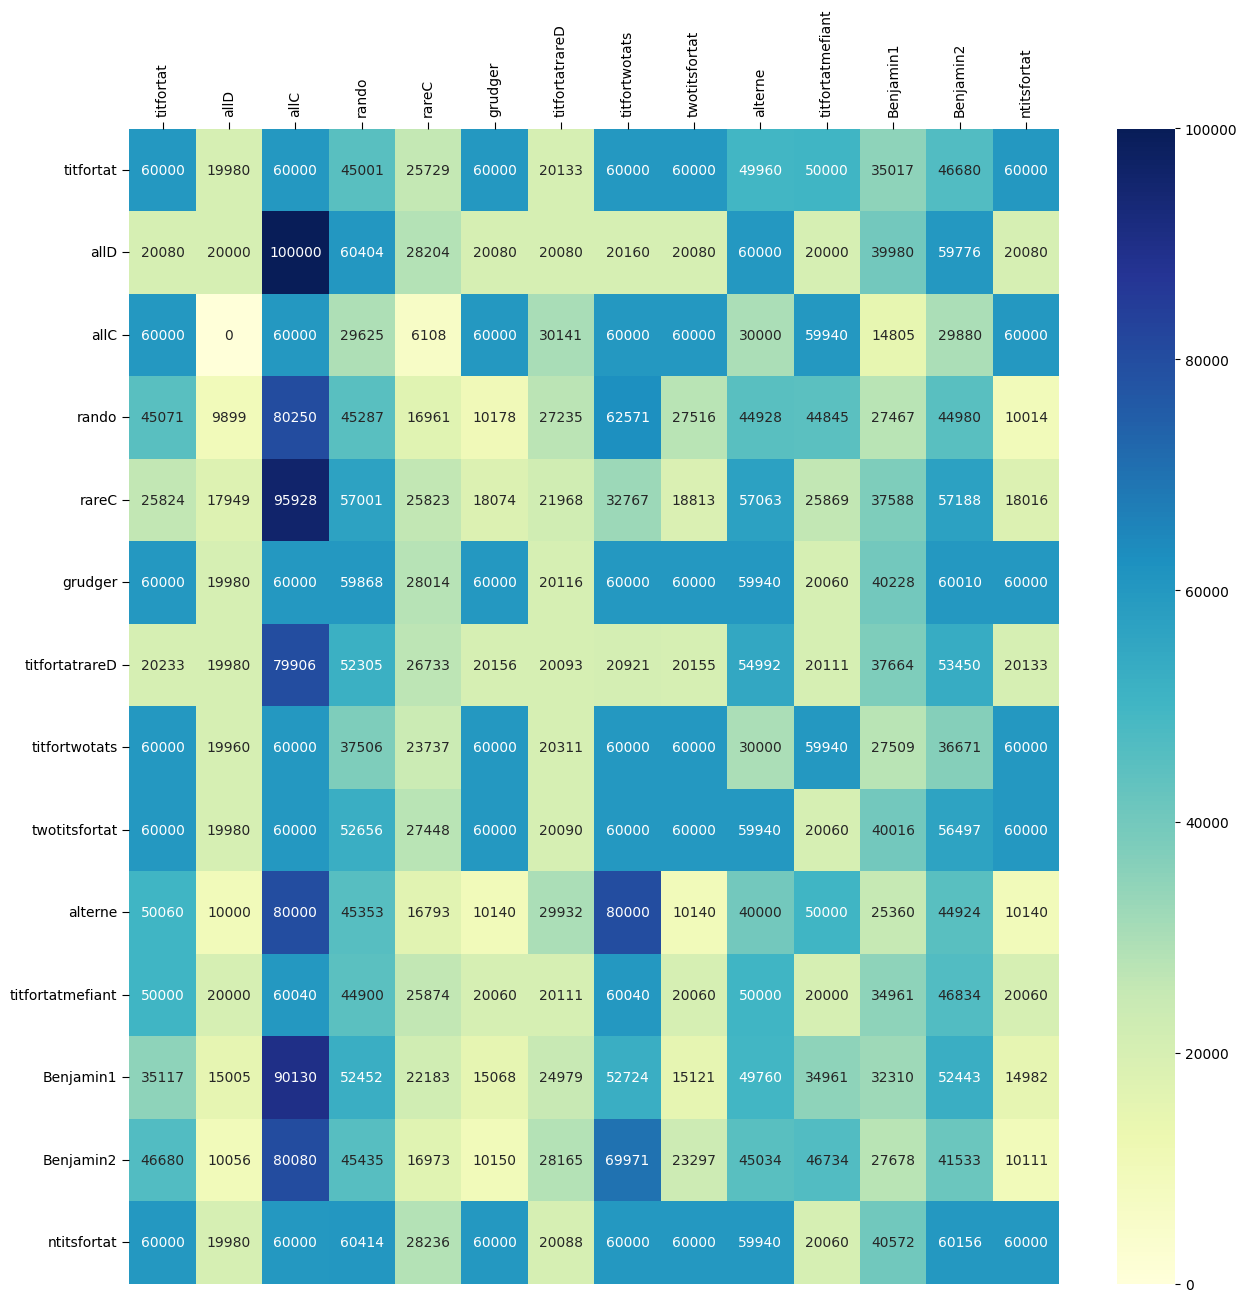

In [256]:
plt.figure(figsize=(15,15))
s = sns.heatmap(matrice_tournoi, annot=True, fmt="d", cmap='YlGnBu', xticklabels=liste_joueurs, yticklabels=liste_joueurs)
plt.tick_params(axis='both', which='both', length=5)
s.xaxis.tick_top()
s.xaxis.set_label_position('top')
plt.xticks(rotation=90)